# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Scaling" data-toc-modified-id="Scaling-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Scaling</a></div><div class="lev1 toc-item"><a href="#Planing" data-toc-modified-id="Planing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Planing</a></div>

This notebook checks that the data saved using the standard scaler has actually been scaled. In addition, we check that the planing weights flatten the distributions.

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [2]:
plt.rcParams.update({'font.family': 'cmr10',
                     'font.size': 12,
                     'axes.unicode_minus': False,
                     'axes.labelsize': 12,
                     'axes.labelsize': 12,
                     'figure.figsize': (4, 4),
                     'figure.dpi': 80,
                     'mathtext.fontset': 'cm',
                     'mathtext.rm': 'serif',
                     'xtick.direction': 'in',
                     'ytick.direction': 'in',
                     'xtick.top': True,
                     'ytick.right': True
                    })

Load the data. If the data is not present, run `make data`

In [3]:
X = np.load('../data/interim/train_scaled_X_2p.npy')
y = np.load('../data/interim/train_Y_2p.npy')
mass = np.load('../data/interim/train_jetmass_2p.npy')
print(X.shape)
print(y.shape)
print(mass.shape)

(237452, 12)
(237452, 1)
(237452,)


The columns for the original data were give by the following

In [4]:
cols = [r'$p_T$', r'$\tau_{1}^{1/2}$',
        r'$\tau_{1}^{1}$', r'$\tau_{1}^{2}$',
        r'$\tau_{2}^{1/2}$', r'$\tau_{2}^{1}$', r'$\tau_{2}^{2}$',
        r'$\tau_{3}^{1/2}$', r'$\tau_{3}^{1}$', r'$\tau_{3}^{2}$',
        r'$\tau_{4}^{1}$', r'$\tau_{4}^{2}$'
       ]

# Scaling

Now plot histograms of the scaled data. Each variable (other than mass, which is not a training variable) should have 0 mean and unit variance.

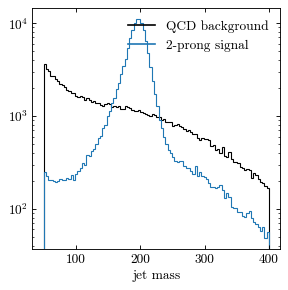

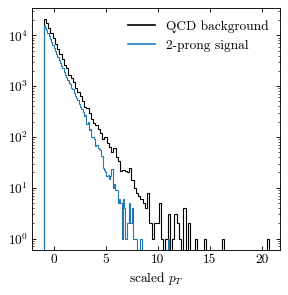

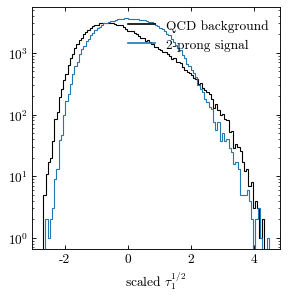

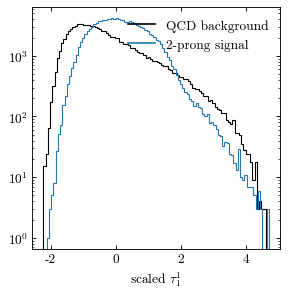

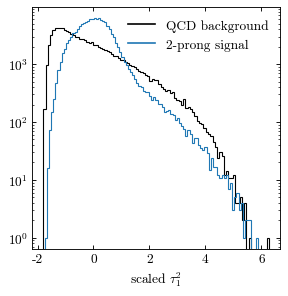

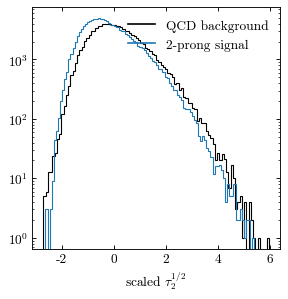

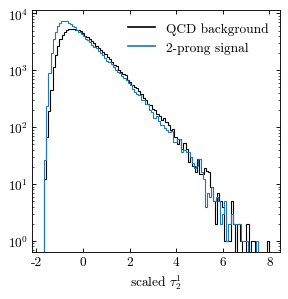

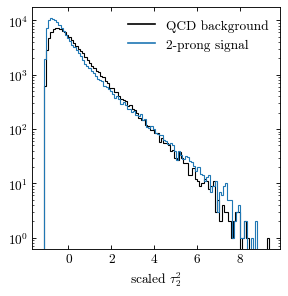

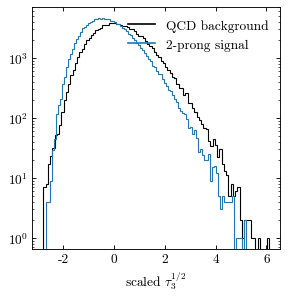

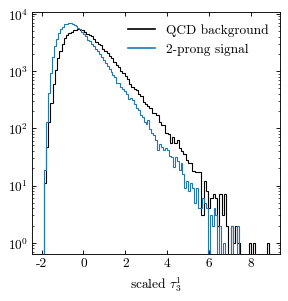

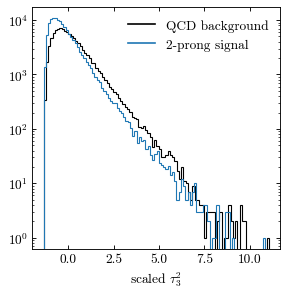

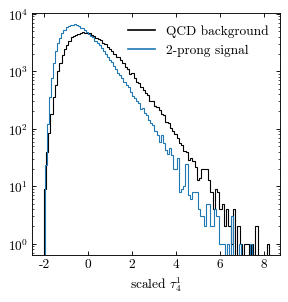

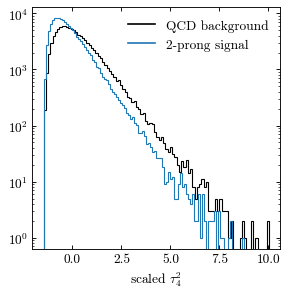

In [5]:
plt.hist(mass[np.ravel(y==0)], bins=100,
         histtype='step', color='k')
plt.hist(mass[np.ravel(y==1)], bins=100,
         histtype='step', color='C0')
plt.plot([], [], color='k', label='QCD background')
plt.plot([], [], color='C0', label='2-prong signal')
plt.legend(loc='best', frameon=False, fontsize=12)
plt.xlabel('jet mass')
plt.yscale('log')
plt.show()

for i in range(len(cols)):
    plt.hist(X[np.ravel(y==0), i], bins=100, histtype='step', color='k')
    plt.hist(X[np.ravel(y==1), i], bins=100, histtype='step', color='C0')
    plt.xlabel('scaled ' + cols[i])
    plt.yscale('log')
    plt.plot([], [], color='k', label='QCD background')
    plt.plot([], [], color='C0', label='2-prong signal')
    plt.legend(loc='best', frameon=False, fontsize=12)
    plt.show()

This has worked. As we have a lot of data, it extends past the unit variance, but all of the data is on the same scale.

# Planing
Now check if the planing works. Load in the weight to apply for each event in the histograms.

In [6]:
weights = np.load('../data/interim/train_planing_weights_2p.npy')
print(weights.shape)

(237452, 1)


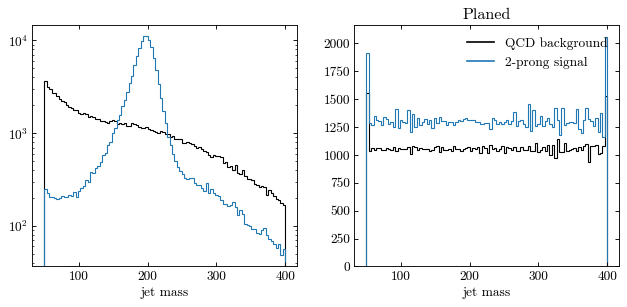

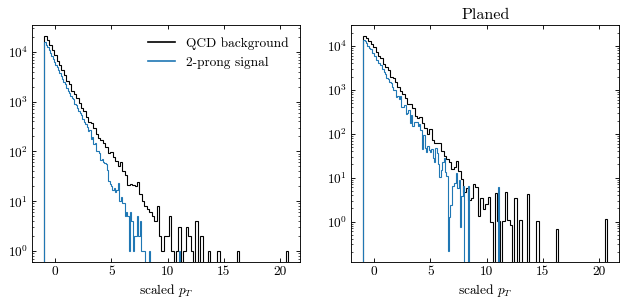

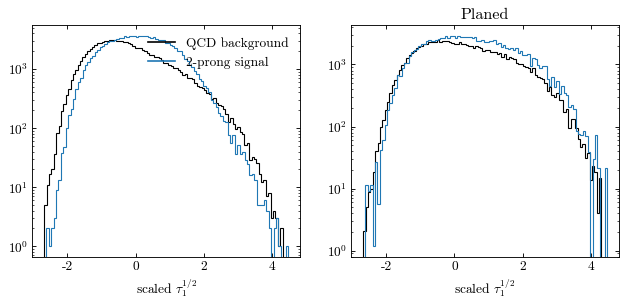

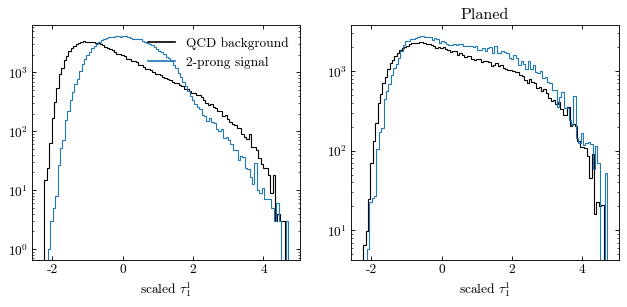

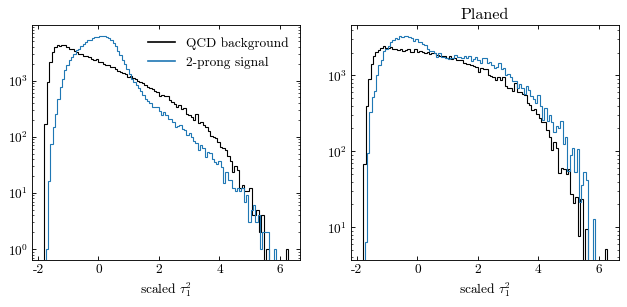

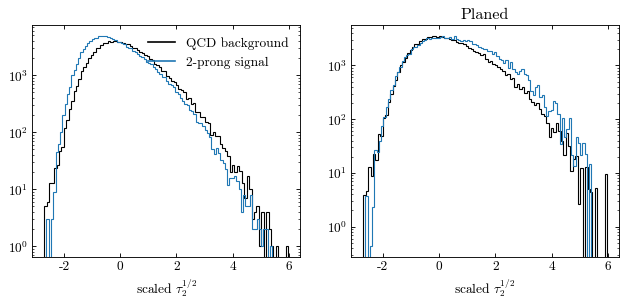

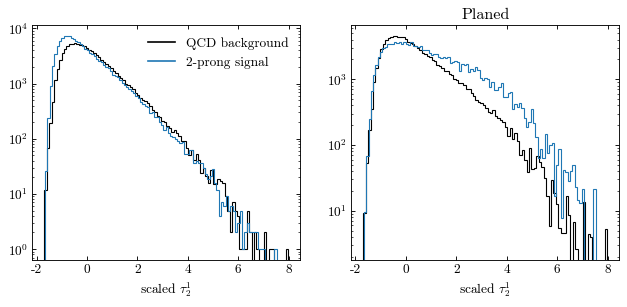

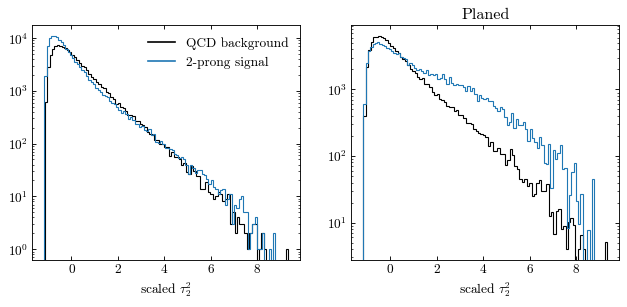

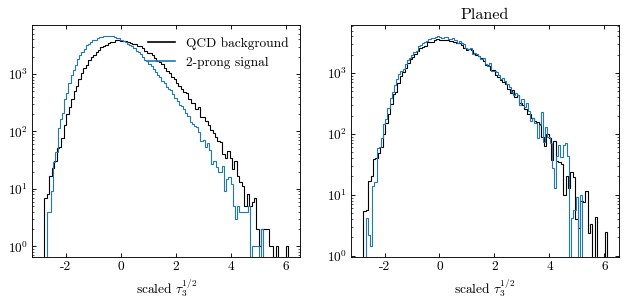

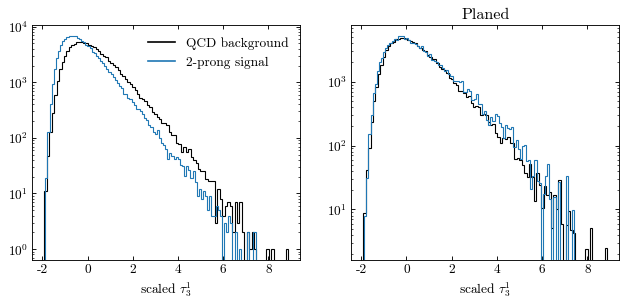

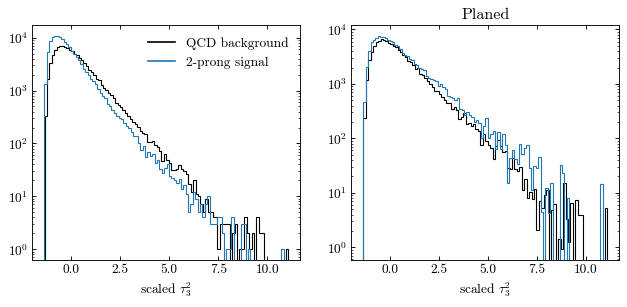

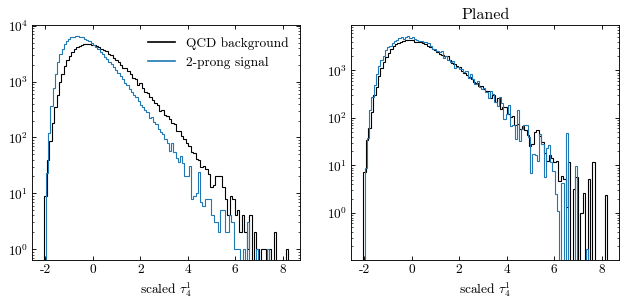

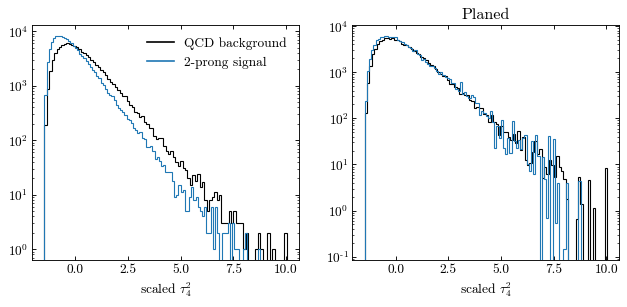

In [7]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.hist(mass[np.ravel(y==0)], bins=100,
         histtype='step', color='k')
plt.hist(mass[np.ravel(y==1)], bins=100,
         histtype='step', color='C0')
plt.xlabel('jet mass')
plt.yscale('log')

plt.subplot(1, 2, 2)
plt.hist(mass[np.ravel(y==0)], bins=100,
         histtype='step', color='k', weights=weights[np.ravel(y==0)])
plt.hist(mass[np.ravel(y==1)], bins=100,
         histtype='step', color='C0', weights=weights[np.ravel(y==1)])
plt.xlabel('jet mass')
# plt.yscale('log')
plt.title('Planed')
plt.plot([], [], color='k', label='QCD background')
plt.plot([], [], color='C0', label='2-prong signal')
plt.legend(loc='best', frameon=False, fontsize=12)

plt.tight_layout(w_pad=2)
plt.show()

for i in range(len(cols)):
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.hist(X[np.ravel(y==0), i], bins=100,
             histtype='step', color='k')
    plt.hist(X[np.ravel(y==1), i], bins=100,
             histtype='step', color='C0')
    plt.xlabel('scaled ' + cols[i])
    plt.yscale('log')
    plt.plot([], [], color='k', label='QCD background')
    plt.plot([], [], color='C0', label='2-prong signal')
    plt.legend(loc='best', frameon=False, fontsize=12)
    
    plt.subplot(1, 2, 2)
    plt.hist(X[np.ravel(y==0), i], bins=100,
             histtype='step', color='k', weights=weights[np.ravel(y==0)])
    plt.hist(X[np.ravel(y==1), i], bins=100,
             histtype='step', color='C0', weights=weights[np.ravel(y==1)])
    plt.xlabel('scaled ' + cols[i])
    plt.yscale('log')
    plt.title('Planed')
    plt.tight_layout(w_pad=2)
    plt.show()

This shows that the weights have been implemented such that it looks like we are evenly sampling over the jet mass. By doing this, we see correlated shifts in the training features. Part of the question of this study is to see if these shifts will make the 